In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

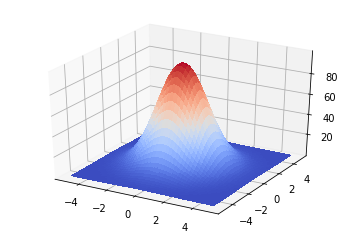

0.36787944117144233

In [2]:
X = np.linspace(-5,5)
Y = np.linspace(-5,5)
X, Y = np.meshgrid(X, Y)

Z = 100*np.exp(-1*(X**2 + Y**2)/5)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)
Z1 = Z.reshape(-1,1)

np.exp(-1)

In [3]:
def plot3d(x, y, z):
    l = int(np.sqrt(x.shape[0]))
    x1 = x.reshape(l,l)
    y1 = y.reshape(l,l)
    z1 = z.reshape(l,l)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.show()
   # ax.set_zlim(-1.01, 1.01)

    X1 = X.reshape(-1,1)
    Y1 = Y.reshape(-1,1)
    Z1 = Z.reshape(-1,1)

In [4]:
def model_fn(features, labels, mode, params={}):
    # b -- batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    p = params.get("p", 1)
    
    # Layer 1
    w = tf.get_variable("w", shape=[2, p], dtype=tf.float64) # 2 x p
    b = tf.get_variable("b", shape=[1, p], dtype=tf.float64) # 1 x p
    
    out1 = b + tf.matmul(inputs, w) # b x p
    # Hidden layer
    out2 = tf.nn.relu(out1) # b x p
    
    # Final transformation
    
    w_outer = tf.get_variable("w_outer", shape=[p, 1], dtype=tf.float64) # p x 1
    b_outer = tf.get_variable("b_outer", shape=[1, 1], dtype=tf.float64) # 1 x 1

    out3 = tf.matmul(out2, w_outer)  + b_outer# b x 1
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

# Shape experiments trial

In [5]:
npa = np.array(range(1,5), dtype=np.float32).reshape(-1,1)
npb = npa + 2

a = tf.constant(npa)
b = tf.constant(npb)

tf.matmul(tf.transpose(a),b)

tf.concat([npa, npb],axis=1)

<tf.Tensor 'concat:0' shape=(4, 2) dtype=float32>

In [6]:
estimator = tf.estimator.Estimator(model_fn=model_fn, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=1, shuffle=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpvXrx5T', '_save_summary_steps': 100}


In [7]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpvXrx5T/model.ckpt.
INFO:tensorflow:loss = 114.166, step = 1
INFO:tensorflow:global_step/sec: 1158.39
INFO:tensorflow:loss = 102.281, step = 101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1481.02
INFO:tensorflow:loss = 70.9139, step = 201 (0.067 sec)
INFO:tensorflow:global_step/sec: 1605.83
INFO:tensorflow:loss = 2688.32, step = 301 (0.062 sec)
INFO:tensorflow:global_step/sec: 1527.61
INFO:tensorflow:loss = 933.28, step = 401 (0.065 sec)
INFO:tensorflow:global_step/sec: 1522.72
INFO:tensorflow:loss = 845.39, step = 501 (0.066 sec)
INFO:tensorflow:global_step/sec: 1575.05
INFO:tensorflow:loss = 5.37246, step = 601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1539.24
INFO:tensorflow:loss = 451.749, step = 701 (0.065 sec)
INFO:tensorflow:global_step/sec: 1443.23
INFO:tensorflow:loss = 2722.99, step = 801 (0.069 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1476.36
INFO:tensorflow:loss = 64.9386, step = 8401 (0.068 sec)
INFO:tensorflow:global_step/sec: 1668.22
INFO:tensorflow:loss = 78.372, step = 8501 (0.060 sec)
INFO:tensorflow:global_step/sec: 1627.71
INFO:tensorflow:loss = 74.7886, step = 8601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1646.63
INFO:tensorflow:loss = 1819.24, step = 8701 (0.061 sec)
INFO:tensorflow:global_step/sec: 1620.19
INFO:tensorflow:loss = 1615.04, step = 8801 (0.062 sec)
INFO:tensorflow:global_step/sec: 1671.82
INFO:tensorflow:loss = 969.458, step = 8901 (0.060 sec)
INFO:tensorflow:global_step/sec: 1621.01
INFO:tensorflow:loss = 1320.34, step = 9001 (0.062 sec)
INFO:tensorflow:global_step/sec: 1626.92
INFO:tensorflow:loss = 78.8348, step = 9101 (0.061 sec)
INFO:tensorflow:global_step/sec: 1660.03
INFO:tensorflow:loss = 2324.89, step = 9201 (0.060 sec)
INFO:tensorflow:global_step/sec: 1615.17
INFO:tensorflow:loss = 245.796, step = 9301 (0.062 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 1406.87
INFO:tensorflow:loss = 1017.78, step = 16801 (0.071 sec)
INFO:tensorflow:global_step/sec: 1602.38
INFO:tensorflow:loss = 238.317, step = 16901 (0.062 sec)
INFO:tensorflow:global_step/sec: 1482.12
INFO:tensorflow:loss = 67.9483, step = 17001 (0.068 sec)
INFO:tensorflow:global_step/sec: 1350.91
INFO:tensorflow:loss = 818.466, step = 17101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1546.07
INFO:tensorflow:loss = 599.9, step = 17201 (0.065 sec)
INFO:tensorflow:global_step/sec: 1592.64
INFO:tensorflow:loss = 584.698, step = 17301 (0.063 sec)
INFO:tensorflow:global_step/sec: 1576.69
INFO:tensorflow:loss = 71.5647, step = 17401 (0.063 sec)
INFO:tensorflow:global_step/sec: 1585.34
INFO:tensorflow:loss = 55.1696, step = 17501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1553.23
INFO:tensorflow:loss = 291.633, step = 17601 (0.064 sec)
INFO:tensorflow:global_step/sec: 1579.01
INFO:tensorflow:loss = 521.815, step = 17701 (0.063 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 1661.1
INFO:tensorflow:loss = 54.8381, step = 25201 (0.060 sec)
INFO:tensorflow:global_step/sec: 1553.91
INFO:tensorflow:loss = 134.996, step = 25301 (0.064 sec)
INFO:tensorflow:global_step/sec: 1611.14
INFO:tensorflow:loss = 206.142, step = 25401 (0.062 sec)
INFO:tensorflow:global_step/sec: 1562.67
INFO:tensorflow:loss = 57.3731, step = 25501 (0.064 sec)
INFO:tensorflow:global_step/sec: 1646.79
INFO:tensorflow:loss = 48.2218, step = 25601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1502.4
INFO:tensorflow:loss = 620.383, step = 25701 (0.067 sec)
INFO:tensorflow:global_step/sec: 1572.53
INFO:tensorflow:loss = 319.789, step = 25801 (0.064 sec)
INFO:tensorflow:global_step/sec: 1540.17
INFO:tensorflow:loss = 60.4593, step = 25901 (0.065 sec)
INFO:tensorflow:global_step/sec: 1448.5
INFO:tensorflow:loss = 173.389, step = 26001 (0.069 sec)
INFO:tensorflow:global_step/sec: 1308.18
INFO:tensorflow:loss = 50.3869, step = 26101 (0.076 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1641.99
INFO:tensorflow:loss = 214.228, step = 33601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1616.97
INFO:tensorflow:loss = 50.6447, step = 33701 (0.062 sec)
INFO:tensorflow:global_step/sec: 1622.75
INFO:tensorflow:loss = 413.936, step = 33801 (0.062 sec)
INFO:tensorflow:global_step/sec: 1573.24
INFO:tensorflow:loss = 72.0794, step = 33901 (0.064 sec)
INFO:tensorflow:global_step/sec: 1659.01
INFO:tensorflow:loss = 561.052, step = 34001 (0.060 sec)
INFO:tensorflow:global_step/sec: 1639.45
INFO:tensorflow:loss = 78.0822, step = 34101 (0.061 sec)
INFO:tensorflow:global_step/sec: 1623.93
INFO:tensorflow:loss = 56.6035, step = 34201 (0.062 sec)
INFO:tensorflow:global_step/sec: 1566.44
INFO:tensorflow:loss = 38.1806, step = 34301 (0.064 sec)
INFO:tensorflow:global_step/sec: 1651.53
INFO:tensorflow:loss = 24.9418, step = 34401 (0.061 sec)
INFO:tensorflow:global_step/sec: 1646.39
INFO:tensorflow:loss = 66.3646, step = 34501 (0.061 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 1651.42
INFO:tensorflow:loss = 20.5564, step = 42001 (0.060 sec)
INFO:tensorflow:global_step/sec: 1619.7
INFO:tensorflow:loss = 78.3465, step = 42101 (0.062 sec)
INFO:tensorflow:global_step/sec: 1545.38
INFO:tensorflow:loss = 190.581, step = 42201 (0.065 sec)
INFO:tensorflow:global_step/sec: 1511.51
INFO:tensorflow:loss = 240.086, step = 42301 (0.066 sec)
INFO:tensorflow:global_step/sec: 1487.47
INFO:tensorflow:loss = 66.1754, step = 42401 (0.067 sec)
INFO:tensorflow:global_step/sec: 1528.45
INFO:tensorflow:loss = 220.089, step = 42501 (0.065 sec)
INFO:tensorflow:global_step/sec: 1646.2
INFO:tensorflow:loss = 38.6765, step = 42601 (0.061 sec)
INFO:tensorflow:global_step/sec: 1637.89
INFO:tensorflow:loss = 38.9651, step = 42701 (0.061 sec)
INFO:tensorflow:global_step/sec: 1647.2
INFO:tensorflow:loss = 233.37, step = 42801 (0.061 sec)
INFO:tensorflow:global_step/sec: 1639.99
INFO:tensorflow:loss = 138.566, step = 42901 (0.061 sec)
INFO:tensorflow:global_s

In [8]:

predict2 = tf.estimator.inputs.numpy_input_fn({"X": np.array([0, 0, 0], dtype=np.float64).reshape(-1,1), "Y":np.array([0, 0, 0], dtype=np.float64).reshape(-1,1)}, y=np.array([0,0,0], dtype=np.float64).reshape(-1,1), batch_size=1, num_epochs=50, shuffle=True)

Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)
#Zgen.next()

INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpvXrx5T/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-25-08:50:15
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpvXrx5T/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-25-08:50:15
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 111.978


{'global_step': 50001, 'loss': 111.97816}

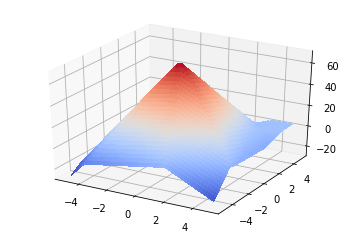

In [9]:
plot3d(X1, Y1, Zout)

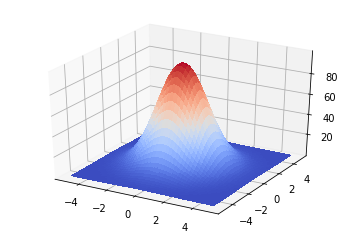

In [10]:
plot3d(X1, Y1, Z1)

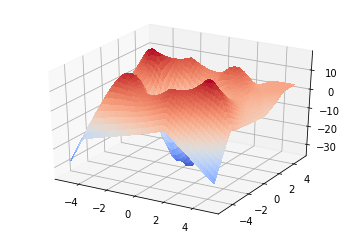

In [11]:
plot3d(X1, Y1, Zout-Z1)

# NN regression using dense layers

In [12]:
def model_fn_with_dense(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out2,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out2)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out2,
        loss = loss,
        train_op = train_op
    )

In [13]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 1})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpEWLcCS', '_save_summary_steps': 100}


In [14]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpEWLcCS/model.ckpt.
INFO:tensorflow:loss = 356.088, step = 1
INFO:tensorflow:global_step/sec: 1233.68
INFO:tensorflow:loss = 36.695, step = 101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1668.86
INFO:tensorflow:loss = 33.6787, step = 201 (0.060 sec)
INFO:tensorflow:global_step/sec: 1651.53
INFO:tensorflow:loss = 778.029, step = 301 (0.060 sec)
INFO:tensorflow:global_step/sec: 1644.73
INFO:tensorflow:loss = 445.936, step = 401 (0.061 sec)
INFO:tensorflow:global_step/sec: 1678.22
INFO:tensorflow:loss = 1377.22, step = 501 (0.060 sec)
INFO:tensorflow:global_step/sec: 1540.86
INFO:tensorflow:loss = 72.4534, step = 601 (0.065 sec)
INFO:tensorflow:global_step/sec: 1661.13
INFO:tensorflow:loss = 82.5894, step = 701 (0.060 sec)
INFO:tensorflow:global_step/sec: 1624.3
INFO:tensorflow:loss = 2052.9, step = 801 (0.061 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 1614.54
INFO:tensorflow:loss = 1556.32, step = 8401 (0.062 sec)
INFO:tensorflow:global_step/sec: 1534.33
INFO:tensorflow:loss = 75.7057, step = 8501 (0.065 sec)
INFO:tensorflow:global_step/sec: 1602.16
INFO:tensorflow:loss = 329.339, step = 8601 (0.062 sec)
INFO:tensorflow:global_step/sec: 1657
INFO:tensorflow:loss = 908.274, step = 8701 (0.060 sec)
INFO:tensorflow:global_step/sec: 1466.69
INFO:tensorflow:loss = 1056.76, step = 8801 (0.068 sec)
INFO:tensorflow:global_step/sec: 1588.03
INFO:tensorflow:loss = 700.254, step = 8901 (0.063 sec)
INFO:tensorflow:global_step/sec: 1623.3
INFO:tensorflow:loss = 1345.52, step = 9001 (0.062 sec)
INFO:tensorflow:global_step/sec: 1413.61
INFO:tensorflow:loss = 2.63417, step = 9101 (0.071 sec)
INFO:tensorflow:global_step/sec: 1649.68
INFO:tensorflow:loss = 682.663, step = 9201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1646.85
INFO:tensorflow:loss = 1099.13, step = 9301 (0.061 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:global_step/sec: 1655.25
INFO:tensorflow:loss = 1338.53, step = 16801 (0.060 sec)
INFO:tensorflow:global_step/sec: 1565.24
INFO:tensorflow:loss = 72.4793, step = 16901 (0.064 sec)
INFO:tensorflow:global_step/sec: 1643.85
INFO:tensorflow:loss = 848.783, step = 17001 (0.061 sec)
INFO:tensorflow:global_step/sec: 1653.36
INFO:tensorflow:loss = 8.05874, step = 17101 (0.060 sec)
INFO:tensorflow:global_step/sec: 1633.93
INFO:tensorflow:loss = 81.0632, step = 17201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1506.86
INFO:tensorflow:loss = 9.01096, step = 17301 (0.066 sec)
INFO:tensorflow:global_step/sec: 1654.89
INFO:tensorflow:loss = 626.462, step = 17401 (0.060 sec)
INFO:tensorflow:global_step/sec: 1638.32
INFO:tensorflow:loss = 24.4628, step = 17501 (0.061 sec)
INFO:tensorflow:global_step/sec: 1660.64
INFO:tensorflow:loss = 26.5456, step = 17601 (0.060 sec)
INFO:tensorflow:global_step/sec: 1566.29
INFO:tensorflow:loss = 312.999, step = 17701 (0.064 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 1470.48
INFO:tensorflow:loss = 842.902, step = 25201 (0.068 sec)
INFO:tensorflow:global_step/sec: 1339.94
INFO:tensorflow:loss = 969.67, step = 25301 (0.075 sec)
INFO:tensorflow:global_step/sec: 1430.27
INFO:tensorflow:loss = 97.0032, step = 25401 (0.070 sec)
INFO:tensorflow:global_step/sec: 1340.92
INFO:tensorflow:loss = 311.727, step = 25501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1462.05
INFO:tensorflow:loss = 19.661, step = 25601 (0.068 sec)
INFO:tensorflow:global_step/sec: 1459.79
INFO:tensorflow:loss = 31.6864, step = 25701 (0.068 sec)
INFO:tensorflow:global_step/sec: 1497.35
INFO:tensorflow:loss = 735.064, step = 25801 (0.067 sec)
INFO:tensorflow:global_step/sec: 1217.11
INFO:tensorflow:loss = 37.9287, step = 25901 (0.082 sec)
INFO:tensorflow:global_step/sec: 1428.64
INFO:tensorflow:loss = 773.575, step = 26001 (0.070 sec)
INFO:tensorflow:global_step/sec: 1492.25
INFO:tensorflow:loss = 1008.9, step = 26101 (0.067 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1591.07
INFO:tensorflow:loss = 1013.48, step = 33601 (0.063 sec)
INFO:tensorflow:global_step/sec: 1465.55
INFO:tensorflow:loss = 34.4714, step = 33701 (0.068 sec)
INFO:tensorflow:global_step/sec: 1536.85
INFO:tensorflow:loss = 106.466, step = 33801 (0.065 sec)
INFO:tensorflow:global_step/sec: 1634.07
INFO:tensorflow:loss = 1612.22, step = 33901 (0.061 sec)
INFO:tensorflow:global_step/sec: 1614.52
INFO:tensorflow:loss = 19.6031, step = 34001 (0.062 sec)
INFO:tensorflow:global_step/sec: 1660.47
INFO:tensorflow:loss = 23.8121, step = 34101 (0.060 sec)
INFO:tensorflow:global_step/sec: 1632.92
INFO:tensorflow:loss = 32.2883, step = 34201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1577.96
INFO:tensorflow:loss = 2182.7, step = 34301 (0.063 sec)
INFO:tensorflow:global_step/sec: 1662.64
INFO:tensorflow:loss = 53.5992, step = 34401 (0.060 sec)
INFO:tensorflow:global_step/sec: 1556.08
INFO:tensorflow:loss = 353.074, step = 34501 (0.064 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1630.39
INFO:tensorflow:loss = 302.711, step = 42001 (0.061 sec)
INFO:tensorflow:global_step/sec: 1644.84
INFO:tensorflow:loss = 37.235, step = 42101 (0.061 sec)
INFO:tensorflow:global_step/sec: 1611.14
INFO:tensorflow:loss = 363.77, step = 42201 (0.062 sec)
INFO:tensorflow:global_step/sec: 1619.72
INFO:tensorflow:loss = 1475.25, step = 42301 (0.062 sec)
INFO:tensorflow:global_step/sec: 1326.82
INFO:tensorflow:loss = 812.556, step = 42401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1562.89
INFO:tensorflow:loss = 508.448, step = 42501 (0.064 sec)
INFO:tensorflow:global_step/sec: 1658.54
INFO:tensorflow:loss = 50.9954, step = 42601 (0.060 sec)
INFO:tensorflow:global_step/sec: 1391.92
INFO:tensorflow:loss = 65.8614, step = 42701 (0.072 sec)
INFO:tensorflow:global_step/sec: 1438.97
INFO:tensorflow:loss = 1782.44, step = 42801 (0.070 sec)
INFO:tensorflow:global_step/sec: 1480.58
INFO:tensorflow:loss = 1198.81, step = 42901 (0.067 sec)
INFO:tensorflow:global

In [15]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpEWLcCS/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-25-08:50:53
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpEWLcCS/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-25-08:50:54
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 548.206


{'global_step': 50001, 'loss': 548.20551}

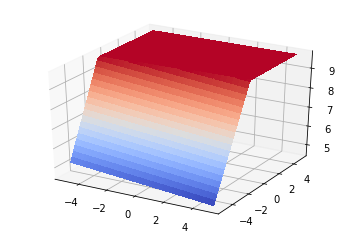

In [16]:
plot3d(X1, Y1, Zout)

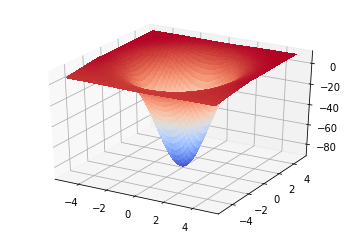

In [17]:
plot3d(X1, Y1, Zout - Z1)

## NN 2 layer

In [18]:
def model_fn_with_dense_2(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=p, activation=tf.nn.relu)
    out3 = tf.layers.dense(inputs=out2, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

In [19]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
estimator.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpr0IFs7', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpr0IFs7/model.ckpt.
INFO:tensorflow:loss = 3483.04, step = 1
INFO:tensorflow:global_step/sec: 1203.7
INFO:tensorflow:loss = 1113.6, step = 101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1645.72
INFO:tensorflow:loss = 672.008, step = 201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1653.11
INFO:tensorflow:loss = 80.347, step = 301 (0.060 sec)
INFO:tensorflow:global_step/sec: 1668.11
INFO:tensorflow:loss = 12.6075, step = 401 (0.060 sec)
INFO:tensorflow:global_step/sec: 1660
INFO:tensorflow:loss = 562.

INFO:tensorflow:global_step/sec: 1659.45
INFO:tensorflow:loss = 1213.58, step = 7901 (0.060 sec)
INFO:tensorflow:global_step/sec: 1653.47
INFO:tensorflow:loss = 570.496, step = 8001 (0.060 sec)
INFO:tensorflow:global_step/sec: 1635.81
INFO:tensorflow:loss = 90.4635, step = 8101 (0.061 sec)
INFO:tensorflow:global_step/sec: 1635.54
INFO:tensorflow:loss = 1726.67, step = 8201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1646.14
INFO:tensorflow:loss = 1142.94, step = 8301 (0.061 sec)
INFO:tensorflow:global_step/sec: 1564.99
INFO:tensorflow:loss = 1771.3, step = 8401 (0.064 sec)
INFO:tensorflow:global_step/sec: 1583.89
INFO:tensorflow:loss = 1778.64, step = 8501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1659.66
INFO:tensorflow:loss = 624.309, step = 8601 (0.060 sec)
INFO:tensorflow:global_step/sec: 1638.76
INFO:tensorflow:loss = 652.19, step = 8701 (0.061 sec)
INFO:tensorflow:global_step/sec: 1656.64
INFO:tensorflow:loss = 134.655, step = 8801 (0.060 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1012.5
INFO:tensorflow:loss = 710.471, step = 16301 (0.099 sec)
INFO:tensorflow:global_step/sec: 1075.59
INFO:tensorflow:loss = 118.51, step = 16401 (0.092 sec)
INFO:tensorflow:global_step/sec: 1591.01
INFO:tensorflow:loss = 42.1315, step = 16501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1606.74
INFO:tensorflow:loss = 215.975, step = 16601 (0.062 sec)
INFO:tensorflow:global_step/sec: 1556.37
INFO:tensorflow:loss = 130.429, step = 16701 (0.064 sec)
INFO:tensorflow:global_step/sec: 1521.4
INFO:tensorflow:loss = 399.06, step = 16801 (0.066 sec)
INFO:tensorflow:global_step/sec: 1579.23
INFO:tensorflow:loss = 683.999, step = 16901 (0.063 sec)
INFO:tensorflow:global_step/sec: 1565.34
INFO:tensorflow:loss = 104.566, step = 17001 (0.064 sec)
INFO:tensorflow:global_step/sec: 1542.33
INFO:tensorflow:loss = 46.6258, step = 17101 (0.065 sec)
INFO:tensorflow:global_step/sec: 1543.86
INFO:tensorflow:loss = 564.732, step = 17201 (0.065 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 1527.61
INFO:tensorflow:loss = 96.6828, step = 24701 (0.065 sec)
INFO:tensorflow:global_step/sec: 1561.18
INFO:tensorflow:loss = 232.529, step = 24801 (0.064 sec)
INFO:tensorflow:global_step/sec: 1573.14
INFO:tensorflow:loss = 152.329, step = 24901 (0.064 sec)
INFO:tensorflow:global_step/sec: 1110.37
INFO:tensorflow:loss = 199.767, step = 25001 (0.090 sec)
INFO:tensorflow:global_step/sec: 1432.85
INFO:tensorflow:loss = 116.04, step = 25101 (0.070 sec)
INFO:tensorflow:global_step/sec: 1592.64
INFO:tensorflow:loss = 95.2404, step = 25201 (0.063 sec)
INFO:tensorflow:global_step/sec: 1653.27
INFO:tensorflow:loss = 118.509, step = 25301 (0.061 sec)
INFO:tensorflow:global_step/sec: 1608.23
INFO:tensorflow:loss = 490.14, step = 25401 (0.062 sec)
INFO:tensorflow:global_step/sec: 1597.83
INFO:tensorflow:loss = 627.864, step = 25501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1503.62
INFO:tensorflow:loss = 41.0781, step = 25601 (0.067 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 1441.81
INFO:tensorflow:loss = 315.677, step = 33101 (0.069 sec)
INFO:tensorflow:global_step/sec: 1396.84
INFO:tensorflow:loss = 8.14825, step = 33201 (0.072 sec)
INFO:tensorflow:global_step/sec: 1425.84
INFO:tensorflow:loss = 138.021, step = 33301 (0.070 sec)
INFO:tensorflow:global_step/sec: 1345.7
INFO:tensorflow:loss = 36.9155, step = 33401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1486.41
INFO:tensorflow:loss = 10.795, step = 33501 (0.067 sec)
INFO:tensorflow:global_step/sec: 1310.55
INFO:tensorflow:loss = 243.132, step = 33601 (0.076 sec)
INFO:tensorflow:global_step/sec: 1438.91
INFO:tensorflow:loss = 7.75981, step = 33701 (0.070 sec)
INFO:tensorflow:global_step/sec: 1519.37
INFO:tensorflow:loss = 239.846, step = 33801 (0.065 sec)
INFO:tensorflow:global_step/sec: 1649.73
INFO:tensorflow:loss = 16.2097, step = 33901 (0.061 sec)
INFO:tensorflow:global_step/sec: 1645.55
INFO:tensorflow:loss = 547.26, step = 34001 (0.061 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1330.62
INFO:tensorflow:loss = 112.48, step = 41501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1627.69
INFO:tensorflow:loss = 41.6099, step = 41601 (0.062 sec)
INFO:tensorflow:global_step/sec: 1662.57
INFO:tensorflow:loss = 333.569, step = 41701 (0.060 sec)
INFO:tensorflow:global_step/sec: 1545.67
INFO:tensorflow:loss = 63.9725, step = 41801 (0.065 sec)
INFO:tensorflow:global_step/sec: 1659.4
INFO:tensorflow:loss = 477.556, step = 41901 (0.060 sec)
INFO:tensorflow:global_step/sec: 1665.83
INFO:tensorflow:loss = 640.881, step = 42001 (0.060 sec)
INFO:tensorflow:global_step/sec: 1658.84
INFO:tensorflow:loss = 131.033, step = 42101 (0.060 sec)
INFO:tensorflow:global_step/sec: 1647.42
INFO:tensorflow:loss = 28.3805, step = 42201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1586.52
INFO:tensorflow:loss = 40.9788, step = 42301 (0.063 sec)
INFO:tensorflow:global_step/sec: 1615.01
INFO:tensorflow:loss = 25.6398, step = 42401 (0.062 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 1998.8
INFO:tensorflow:loss = 124.058, step = 49901 (0.050 sec)
INFO:tensorflow:Saving checkpoints for 50001 into /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpr0IFs7/model.ckpt.
INFO:tensorflow:Loss for final step: 27.1811.


In [20]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpr0IFs7/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-25-08:51:30
INFO:tensorflow:Restoring parameters from /var/folders/1k/0mbw6yb531v01963w262zblc682jgh/T/tmpr0IFs7/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-25-08:51:31
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 103.981


{'global_step': 50001, 'loss': 103.98126}

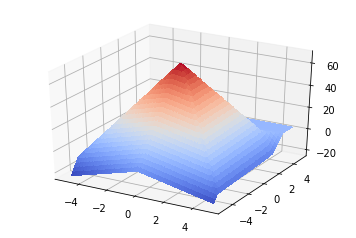

In [21]:
plot3d(X1, Y1, Zout)

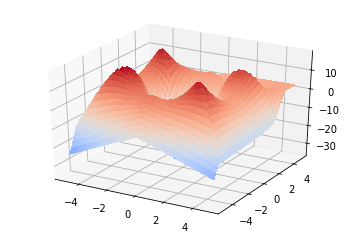

In [22]:
plot3d(X1, Y1, Zout - Z1)